In [1]:
%matplotlib inline

In [2]:
import pandas as pd

# Regression
When:
- x is a quantitative response variable
- y is a quantitative explanatory variable

What to know?
- Is there a association? -> Independence test
- How strong is this association? -> Correlation
- How can we describe the nature of the association? Regression equation

## linear
- $y = ax + b$
    -$a$: slope
    -$b$: intercept
- $y$ is an approximation as other forces than $x$ can also ifluence $y$.
- *Regression function* describes how the mean $y$ changes when $x$ changes.


,x,y
mean,6.375000,30.375000
std,2.924649,7.443837


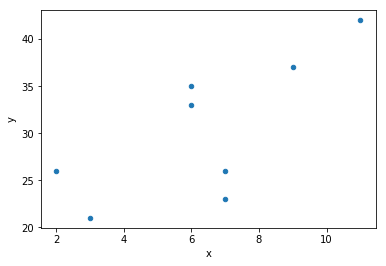

In [3]:
df = pd.DataFrame(
    data=[[9, 37],
          [7, 23],
          [7, 26],
          [3, 21],
          [11, 42],
          [6, 33],
          [2, 26],
          [6, 35]],
    columns=['x', 'y'])
df.plot(kind='scatter', x='x', y='y');
df.describe().loc[['mean', 'std']]

### Estimating $a$ and $b$
Linear equation: $$\bar{y} = \beta x + \alpha$$

###### slope $\beta$
$$\beta = \frac{\sum{(x_{i}-\bar{x})(y_{i}-\bar{y})}}{\sum{(x_{i}-\bar{x})^{2}}}$$
- sign of $\beta$ describes relation (positive/negative) but its value depends on the units of measure. For a standardized slope that does not depend on units use the *correlation $r$*, see further down.

In [4]:
def beta(df):
    x_bar = df.x.mean()
    y_bar = df.y.mean()
    numerator = 0.
    for x_i, y_i in zip(df.x, df.y):
        numerator += (x_i - x_bar) * (y_i - y_bar)
    denominator = 0.
    for x_i in df.x:
        denominator += (x_i - x_bar)**2
    return numerator / denominator
        
b = beta(df)
print('b = {:.2f}'.format(b))

b = 1.87


###### Intercept $\alpha$
$$\alpha = \bar{y}-b\bar{x}$$

In [5]:
def alpha(df):
    y_bar = df.y.mean()
    x_bar = df.x.mean()
    b = beta(df)
    return y_bar - b * x_bar
    
a = alpha(df)
print('a = {:.2f}'.format(a))

a = 18.46


In [6]:
print('y = {:.2f} * x + {:.2f}'.format(b, a))

y = 1.87 * x + 18.46


In [7]:
def predict_y(df, i):
    return beta(df) * df.x[i] + alpha(df)

###### Residual
Prediction error along the y-axis: $y_{i} - \bar{y}$

In [8]:
def residual(y_i, y_pred):
    return y_i - y_pred

res = residual(df.y[0], predict_y(df, 0))
print('Residual = {:.2f}'.format(res))

Residual = 1.72


###### Least squares property
The prediction equation has the smallest *sum of squared errors* compared to all other possible values for $\alpha$ and $\beta$.

In [9]:
def sum_of_squared_errors(df):
    b = beta(df)
    a = alpha(df)
    sse = 0.
    for i, (x_i, y_i) in enumerate(zip(df.x, df.y)):
        sse += residual(y_i, predict_y(df, i))**2
    return sse

sse = sum_of_squared_errors(df)
print('SSE = {:.2f}'.format(sse))

SSE = 178.84


###### Conditional standard deviation of $y$
TODO: sigma = s?  
The variability of all $y$ values at a certain fixed point of $x$ is described by: $$\sigma = s = \sqrt{\frac{SSE}{n-2}}$$

In [10]:
def cond_std(df):
    sse = sum_of_squared_errors(df)
    return (sse / (df.y.count() - 2))**.5

cstd = cond_std(df)
print('Conditional std = {:.2f}'.format(cstd))

Conditional std = 5.46


###### Mean square error (MSE)
$SSE / (n - 2)$

In [11]:
def mean_square_error(df):
    return sum_of_squared_errors(df) / (df.x.count() - 2)

mse = mean_square_error(df)
print('MSE = {:.2f}'.format(mse))

MSE = 29.81


###### Total sum of squares (TSS)
$$TSS = (\sum{y-\bar{y}})^{2}$$

In [12]:
def total_sum_of_squares(df):
    y_mean = df.y.mean()
    tss = 0
    for y_i in df.y:
        tss += (y_i - y_mean)**2
    return tss

tss = total_sum_of_squares(df)
print('TSS = {:.2f}'.format(tss))

TSS = 387.88


$$TSS = SSE + Regression SS$$

In [13]:
def regression_sum_of_squares(df):
    b = beta(df)
    a = beta(df)
    y_mean = df.y.mean()
    rss = 0
    for i, x_i in enumerate(df.x):
        y_pred = predict_y(df, i)
        rss += (y_pred - y_mean)**2
    return rss

rss = regression_sum_of_squares(df)
sse = sum_of_squared_errors(df)
tss = sse + rss
print('TSS = {:.2f}'.format(tss))

TSS = 387.87


###### Correlation $r$
$$r = b(s_{x}/s_{y})$$
- with $s_{x}$ the sample standard deviation of x.
- with $s_{y}$ the sample standard deviation of y.

In other words: "A $1$ std increase in $x$ corresponds with an $r$ std change of $y$."

properties:
- $r$ reflects what $b$ equals when $s_{x} = s_{y}$
- $-1 \leq r leq 1$, with $r$ having the same sign as $b$.
- $r=-1$ or $r=1$ when all sample points are exactly on the predicted line.
- $r=0$ *can* happen when there is a non-linear association.
- The larger $\left | r \right |$, the stronger the association.

In [14]:
def correlation(df):
    return beta(df) * (df.x.std() / df.y.std())

r = correlation(df)
print('r = {:.2f}'.format(r))

r = 0.73


###### Proportional reduction in error $r^{2}$ (coefficient of determination)
- When we use $x$ in the prediction equation to predict $y$, a summary of prediction error is $SSE$.
- When we **do not** use $x$ in the prediction equation to predict $y$, the best predictor is sample mean of $y$, and a summary of prediction error is $TSS$.

This means that prediction using $x$ get better as SSE decreases relative to TSS.

$$ r^{2} = \frac{TSS-SSE}{TSS} $$

In other words: $100r^{2}\%$ of the variation in $y$ is explained by $x$.

properties:
- $0 \leq r^{2} \leq 1$
- $r^{2} = 1$ when all points fall on a line.
- $r^{2} = 0$ when $b = 0$.
- $r^{2}$ does not depend on units.

In [15]:
def coefficient_of_determination(df):
    tss = total_sum_of_squares(df)
    sse = sum_of_squared_errors(df)
    return (tss - sse) / tss

r_squared = coefficient_of_determination(df)
print('r**2 = {:.2f}'.format(r_squared))

r**2 = 0.54


### Inference about slope $\beta$ and correlation $\rho$
###### Assumptions:
- Randomized getting of the data
- Linear equation holds
- The std $\sigma$ of the conditional distribution is the same for all $x$.
- The conditional distribution of $y$ is normal at each value of $x$.
###### Test of independence of $x$ and $y$
Parameter: slope $\beta$
Estimator: least squares estimate $b$

In [16]:
def standard_error(df, x):
    x_mean = df.x.mean()
    s = 0
    for x_i in x:
        s += (x_i - x_mean)**2
    return cond_std(df)/ s**(.5)

print('se x = {}'.format(standard_error(df, df.x)))
print('se y = {}'.format(standard_error(df, df.y)))

se x = 0.7055585022486118
se y = 0.0772413776497985


### Confidence interval slope $\beta$
CI